In [1]:
import math
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import kernelop as kop

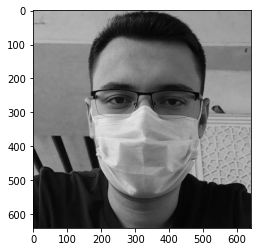

In [2]:
image = Image.open('../assets/pgms/private/metin.pgm')
data = np.asarray(image)
imgplot = plt.imshow(data, cmap='gray', vmin=0, vmax=255)

In [3]:
npFilter = kop.gakernel()
gaussFiltered = kop.conv2d(data, npFilter)

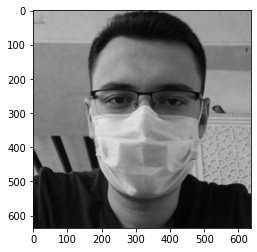

In [4]:
imgplot = plt.imshow(gaussFiltered, cmap='gray', vmin=0, vmax=255)

In [5]:
npFilter = np.array([[1,0,-1],[1,0,-1],[1,0,-1]])
filteredxDir = kop.conv2d(gaussFiltered, npFilter)

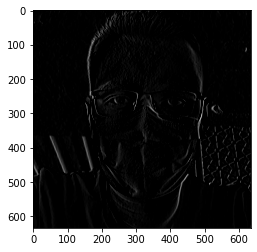

In [6]:
imgplot = plt.imshow(filteredxDir, cmap='gray', vmin=0, vmax=255)

In [7]:
npFilter = np.array([[1,1,1],[0,0,0],[-1,-1,-1]])
filteredyDir = kop.conv2d(gaussFiltered, npFilter)

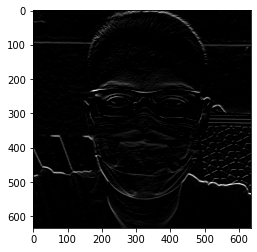

In [8]:
imgplot = plt.imshow(filteredyDir, cmap='gray', vmin=0, vmax=255)

In [9]:
sobel = np.sqrt(np.power(filteredxDir,2)+np.power(filteredyDir,2))
directions = np.arctan2(filteredyDir, filteredxDir)*180 / np.pi

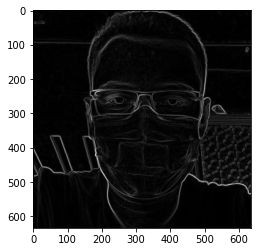

In [10]:
imgplot = plt.imshow(kop.minmaxnorm(sobel), cmap='gray', vmin=0, vmax=255)

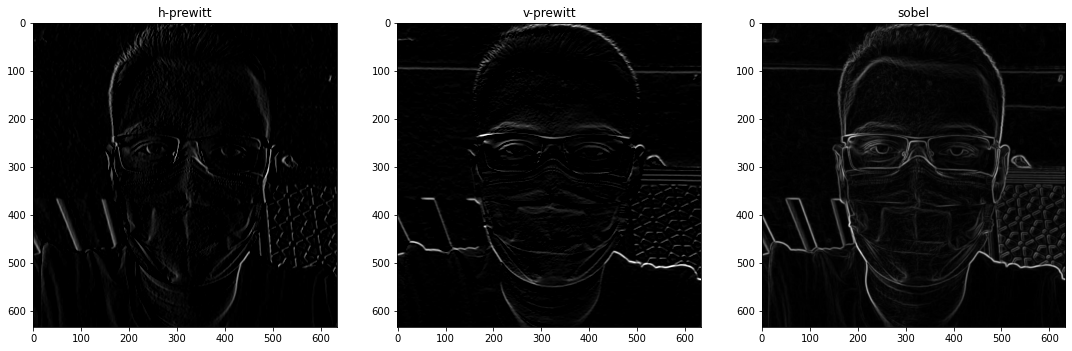

In [11]:
fig, axs = plt.subplots(1, 3)
axs[0].imshow(filteredxDir, cmap='gray', vmin=0, vmax=255)
axs[0].set_title("h-prewitt")
axs[1].imshow(filteredyDir, cmap='gray', vmin=0, vmax=255)
axs[1].set_title("v-prewitt")
axs[2].imshow(kop.minmaxnorm(sobel), cmap='gray', vmin=0, vmax=255)
axs[2].set_title("sobel")
fig.set_size_inches(18.5, 10.5)
plt.show()